<a href="https://colab.research.google.com/github/kangmg/deepvoice_classification/blob/main/Real_Fake_Voice_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### <b>목소리 데이터 다운로드</b>

* 준비된 진짜 목소리 데이터와 가짜 목소리 데이터 압축을 해제합니다.
  * <b>real_voice.zip</b>: 진짜 목소리 데이터
  * <b>fake_voice.zip</b>: 가짜 목소리 데이터

데이터 세트 폴더 구조

<pre>
real_voice_data/
  a.wav
  b.wav
  ...
face_voice_data/
  a.wav
  b.wav
  ...
</pre>
- 일반적으로 나이퀴스트 정리에 따라서, 적어도 20,000 이상의 샘플링 레이트를 가져야 한다.
- 현재 각 wav 파일의 샘플링 레이트(SR)는 22,050이다.
- SR이 22,050 이기 때문에, 4초라면 88,200개의 features가 존재하는 것이다.

In [ ]:
!wget https://postechackr-my.sharepoint.com/:u:/g/personal/dongbinna_postech_ac_kr/Eeq5BhQSiaZPmNSYrcliYykBcGzBngoyWa3OnU_Z7ZQohA?download=1 -O real_voice.zip

--2024-05-13 12:05:21--  https://postechackr-my.sharepoint.com/:u:/g/personal/dongbinna_postech_ac_kr/Eeq5BhQSiaZPmNSYrcliYykBcGzBngoyWa3OnU_Z7ZQohA?download=1
Resolving postechackr-my.sharepoint.com (postechackr-my.sharepoint.com)... 13.107.136.10, 13.107.138.10, 2620:1ec:8f8::10, ...
Connecting to postechackr-my.sharepoint.com (postechackr-my.sharepoint.com)|13.107.136.10|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /personal/dongbinna_postech_ac_kr/Documents/%eb%a9%8b%ec%9f%81%ec%9d%b4%ec%82%ac%ec%9e%90%ec%b2%98%eb%9f%bc/real_voice.zip?ga=1 [following]
--2024-05-13 12:05:23--  https://postechackr-my.sharepoint.com/personal/dongbinna_postech_ac_kr/Documents/%eb%a9%8b%ec%9f%81%ec%9d%b4%ec%82%ac%ec%9e%90%ec%b2%98%eb%9f%bc/real_voice.zip?ga=1
Reusing existing connection to postechackr-my.sharepoint.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 963664838 (919M) [application/x-zip-compressed]
Saving to: ‘real_voice.zip’

real_voice.zip  

In [ ]:
!wget https://postechackr-my.sharepoint.com/:u:/g/personal/dongbinna_postech_ac_kr/EQGzBvyjvK9KjQx3TKlnbjsBJfCC8zVpJ1lnDK_wuuqbkA?download=1 -O fake_voice.zip

--2024-05-13 12:06:06--  https://postechackr-my.sharepoint.com/:u:/g/personal/dongbinna_postech_ac_kr/EQGzBvyjvK9KjQx3TKlnbjsBJfCC8zVpJ1lnDK_wuuqbkA?download=1
Resolving postechackr-my.sharepoint.com (postechackr-my.sharepoint.com)... 13.107.136.10, 13.107.138.10, 2620:1ec:8f8::10, ...
Connecting to postechackr-my.sharepoint.com (postechackr-my.sharepoint.com)|13.107.136.10|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /personal/dongbinna_postech_ac_kr/Documents/%eb%a9%8b%ec%9f%81%ec%9d%b4%ec%82%ac%ec%9e%90%ec%b2%98%eb%9f%bc/fake_voice.zip?ga=1 [following]
--2024-05-13 12:06:10--  https://postechackr-my.sharepoint.com/personal/dongbinna_postech_ac_kr/Documents/%eb%a9%8b%ec%9f%81%ec%9d%b4%ec%82%ac%ec%9e%90%ec%b2%98%eb%9f%bc/fake_voice.zip?ga=1
Reusing existing connection to postechackr-my.sharepoint.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 1006040088 (959M) [application/x-zip-compressed]
Saving to: ‘fake_voice.zip’

fake_voice.zip 

In [ ]:
# 다운로드 받은 학습 데이터 파일의 압축 풀기
%%capture
!unzip fake_voice.zip -d fake_voice_data
!unzip real_voice.zip -d real_voice_data

#### <b>필요한 라이브러리</b>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import sys


def plot_images(images, nrows = None, ncols = None, figsize = None, ax = None,
                axis_style = 'on', bgr2rgb = True):
    '''
    Plots a given list of images and returns axes.Axes object

    Parameters
    -----------
    images: list
            A list of images to plot

    nrows: int
           Number of rows to arrange images into

    ncols: int
           Number of columns to arrange images into

    figsize: tuple
             Plot size (width, height) in inches

    ax: axes.Axes object
        The axis to plot the images on, new axis will be created if None

    axis_style: str
                'off' if axis are not to be displayed
    '''
    N = len(images)
    if not isinstance(images, (list, np.ndarray)):
        raise AttributeError("The images parameter should be a list of images, "
                             "if you want to plot a single image, pass it as a "
                             "list of single image")

    # Setting nrows and ncols as per parameter input
    if nrows is None:
        if ncols is None:
            nrows = N
            ncols = 1
        else:
            nrows = int(np.ceil(N / ncols))
    else:
        if ncols is None:
            ncols = int(np.ceil(N / nrows))

    if ax is None:
        _, ax = plt.subplots(nrows, ncols, figsize = figsize)

    if len(images) == 1:
        if bgr2rgb == True:
            images[0] = cv2.cvtColor(images[0], cv2.COLOR_BGR2RGB)

        ax.imshow(images[0])
        ax.axis(axis_style)

        return ax

    else:
        for i in range(nrows):
            for j in range(ncols):
                if (i * ncols + j) < N:
                    img = images[i * ncols + j]

                    if bgr2rgb == True:
                            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

                    # For this condition, ax is a 2d array else a 1d array
                    if nrows >1 and ncols > 1:
                        ax[i][j].imshow(img)

                    else:
                        ax[i + j].imshow(img)

                if nrows > 1 and ncols > 1:
                    ax[i][j].axis(axis_style)
                else:
                    ax[i + j].axis(axis_style)

        return ax


def drawProgressBar(current, total, string = '', barLen = 20):
    '''
    Draws a progress bar, something like [====>    ] 20%

    Parameters
    ------------
    current: int/float
             Current progress

    total: int/float
           The total from which the current progress is made

    string: str
            Additional details to write along with progress

    barLen: int
            Length of progress bar
    '''
    percent = current/total
    arrow = ">"
    if percent == 1:
        arrow = ""
    # Carriage return, returns to the begining of line to owerwrite
    sys.stdout.write("\r")
    sys.stdout.write("Progress: [{:<{}}] {}/{}".format("=" * int(barLen * percent) + arrow,
                                                         barLen, current, total) + string)
    sys.stdout.flush()

In [ ]:
import IPython.display as ipd
import librosa
import librosa.display

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### <b>예시 가짜 목소리 데이터 확인하기</b>

In [ ]:
ipd.Audio('./fake_voice_data/trim_4s/fake_voice_10_t0.wav')

In [ ]:
# Loading the sample using librosa
ex_data, ex_sr = librosa.load('./fake_voice_data/trim_4s/fake_voice_10_t0.wav')
ex_data.shape, ex_sr

((88436,), 22050)

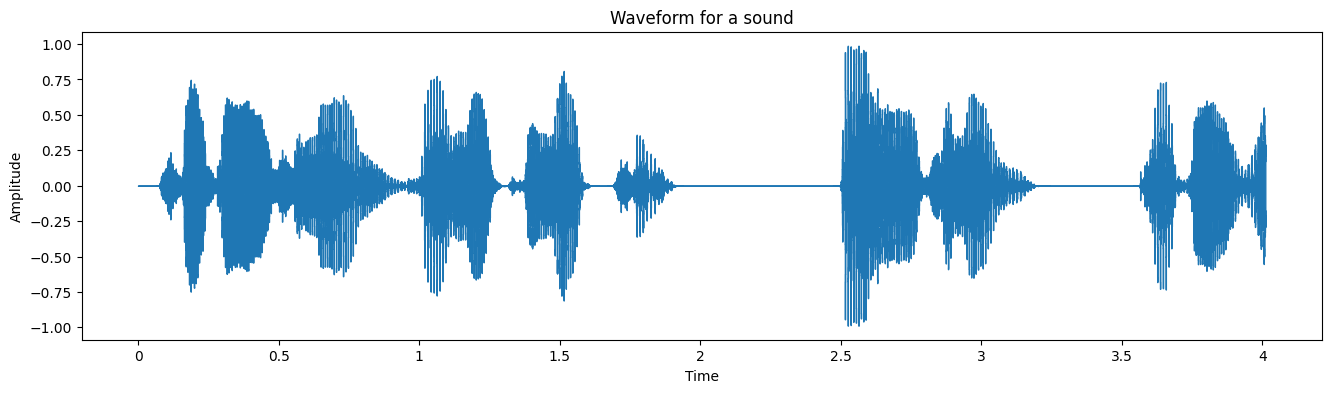

In [ ]:
# Seeing how the sound looks like on a wave plot
fig, ax = plt.subplots(figsize = (16, 4))
librosa.display.waveshow(ex_data, sr = ex_sr)
plt.ylabel('Amplitude')
plt.title('Waveform for a sound')
plt.show()

#### <b>예시 진짜 목소리 데이터 확인하기</b>

In [ ]:
ipd.Audio('./real_voice_data/5f40a0299dd513131eacebae.wav')

In [ ]:
# Loading the sample using librosa
ex_data, ex_sr = librosa.load('./real_voice_data/5f40a0299dd513131eacebae.wav')
ex_data.shape, ex_sr

((101607,), 22050)

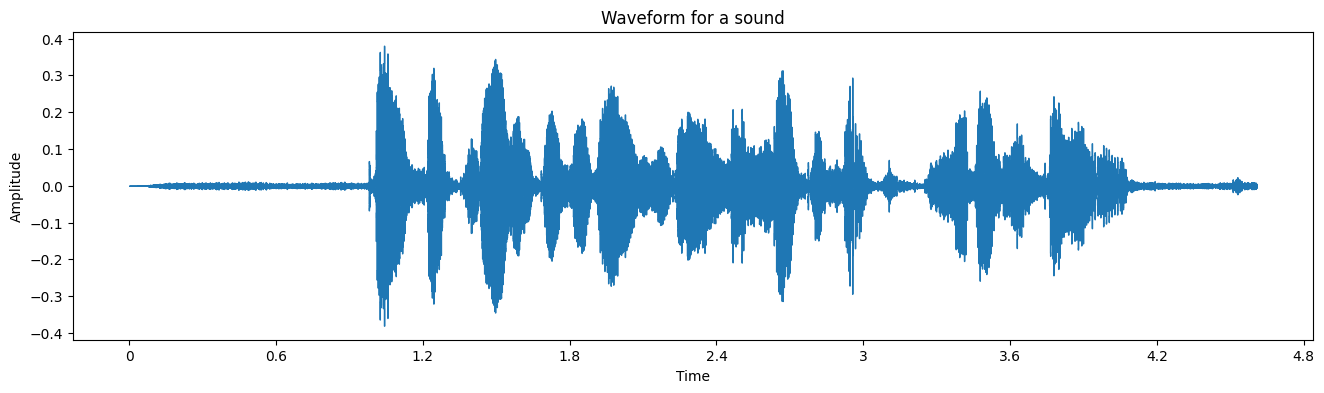

In [ ]:
# Seeing how the sound looks like on a wave plot
fig, ax = plt.subplots(figsize = (16, 4))
librosa.display.waveshow(ex_data, sr = ex_sr)
plt.ylabel('Amplitude')
plt.title('Waveform for a sound')
plt.show()

#### <b>주파수 대역으로 변환하는 코드</b>

In [ ]:
# wav: 오디오 데이터(1차원 배열)
# sr: sample rate (초당 몇 회 샘플링하는지)
# audio_len: 몇 초짜리 오디오인지(현재 코드에서는 4초)
def get_fixed_audio_len(wav, sr, audio_len):
    '''
    Converts a time-series audio to a fixed length either by padding or trimming

    Parameters
    -------------
    wav: Audio time-series

    sr: Sample rate

    audio_len: The fixed audio length needed in seconds
    '''
    # 딥러닝 모델의 입력은 audio_len에 의해 결정되는데, 짧은 오디오 데이터에 대해서는 길이 늘리기
    if wav.shape[0] < audio_len * sr:
        # 부족한 길이만큼, 오디오의 양옆으로 "reflect"해서 붙이기
        wav = np.pad(wav, int(np.ceil((audio_len * sr - wav.shape[0]) / 2)), mode = 'reflect')
    wav = wav[:audio_len * sr] # 앞의 4초만 가져오기

    return wav

In [ ]:
def get_melspectrogram_db(wav, sr, audio_len = 4, n_fft = 2048, hop_length = 512,
                          n_mels = 128, fmin = 20, fmax = 8300, top_db = 80):
    '''
    Decomposes the audio sample into different frequencies using fourier transform
    and converts frequencies to mel scale and amplitude to decibel scale.

    Parameters
    -------------------
    wav: Audio time-series

    sr: Sample rate

    audio_len: The fixed length of audio in seconds

    n_fft: Length of the Fast Fourier Transform window

    hop_length: Number of samples between successive frames

    n_mels: Number of mel filters, which make the height of spectrogram image

    fmin: Lowest frequency

    fmax: Heighest frequency

    top_db: Threashold of the decibel scale output
    '''
    wav = get_fixed_audio_len(wav, sr, audio_len)

    spec = librosa.feature.melspectrogram(y = wav, sr = sr, n_fft = n_fft, hop_length = hop_length,
                                          n_mels = n_mels, fmin = fmin, fmax = fmax)

    spec = librosa.power_to_db(spec, top_db = top_db)
    return spec

In [ ]:
def spec_to_image(spec):
    '''
    Converts the spectrogram to an image

    Parameters
    -------------
    spec: Spectrogram
    '''
    eps=1e-6

    # Z-score normalization
    mean = spec.mean()
    std = spec.std()
    spec_norm = (spec - mean) / (std + eps)
    spec_min, spec_max = spec_norm.min(), spec_norm.max()

    # Min-max scaling
    spec_scaled = 255 * (spec_norm - spec_min) / (spec_max - spec_min)
    spec_scaled = spec_scaled.astype(np.uint8)

    return spec_scaled

#### <b>데이터 시각화 해보기</b>

In [ ]:
# Loading the sample using librosa
ex_data, ex_sr = librosa.load('./real_voice_data/5f41d7ab9dd513131eaceef6.wav')

# Getting the spectrogram and the image of spectogram from time-series audio
spec = get_melspectrogram_db(ex_data, ex_sr)
spec_img = spec_to_image(spec)

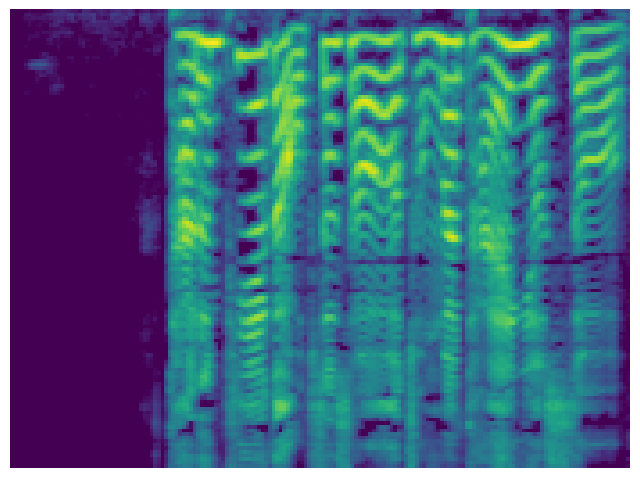

In [ ]:
ax = plot_images([spec_img], ncols = 1, figsize = (8, 12), bgr2rgb = False, axis_style = 'off')
plt.show()

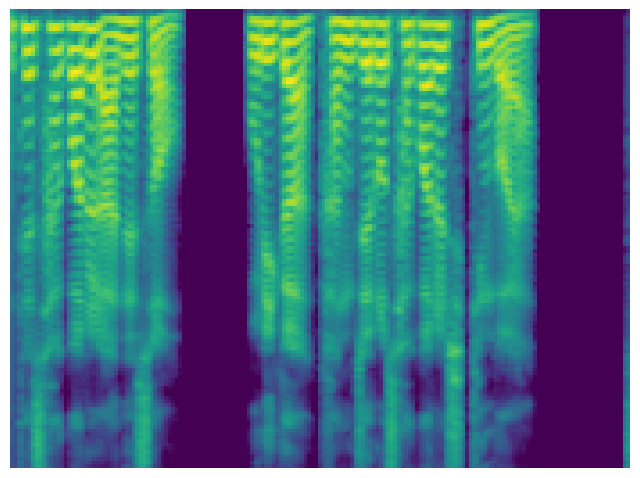

In [ ]:
# Loading the sample using librosa
ex_data, ex_sr = librosa.load('./fake_voice_data/trim_4s/fake_voice_10_t4.wav')

# Getting the spectrogram and the image of spectogram from time-series audio
spec = get_melspectrogram_db(ex_data, ex_sr)
spec_img = spec_to_image(spec)

ax = plot_images([spec_img], ncols = 1, figsize = (8, 12), bgr2rgb = False, axis_style = 'off')
plt.show()

#### <b>뉴럴 네트워크 분류 모델 구현</b>

* 뉴럴 네트워크로 구현할 때는 데이터가 행렬이 아닌 벡터
* 그래서 1차원 배열로 쫙 펼쳐진 88,200 차원의 벡터가 입력으로 들어감

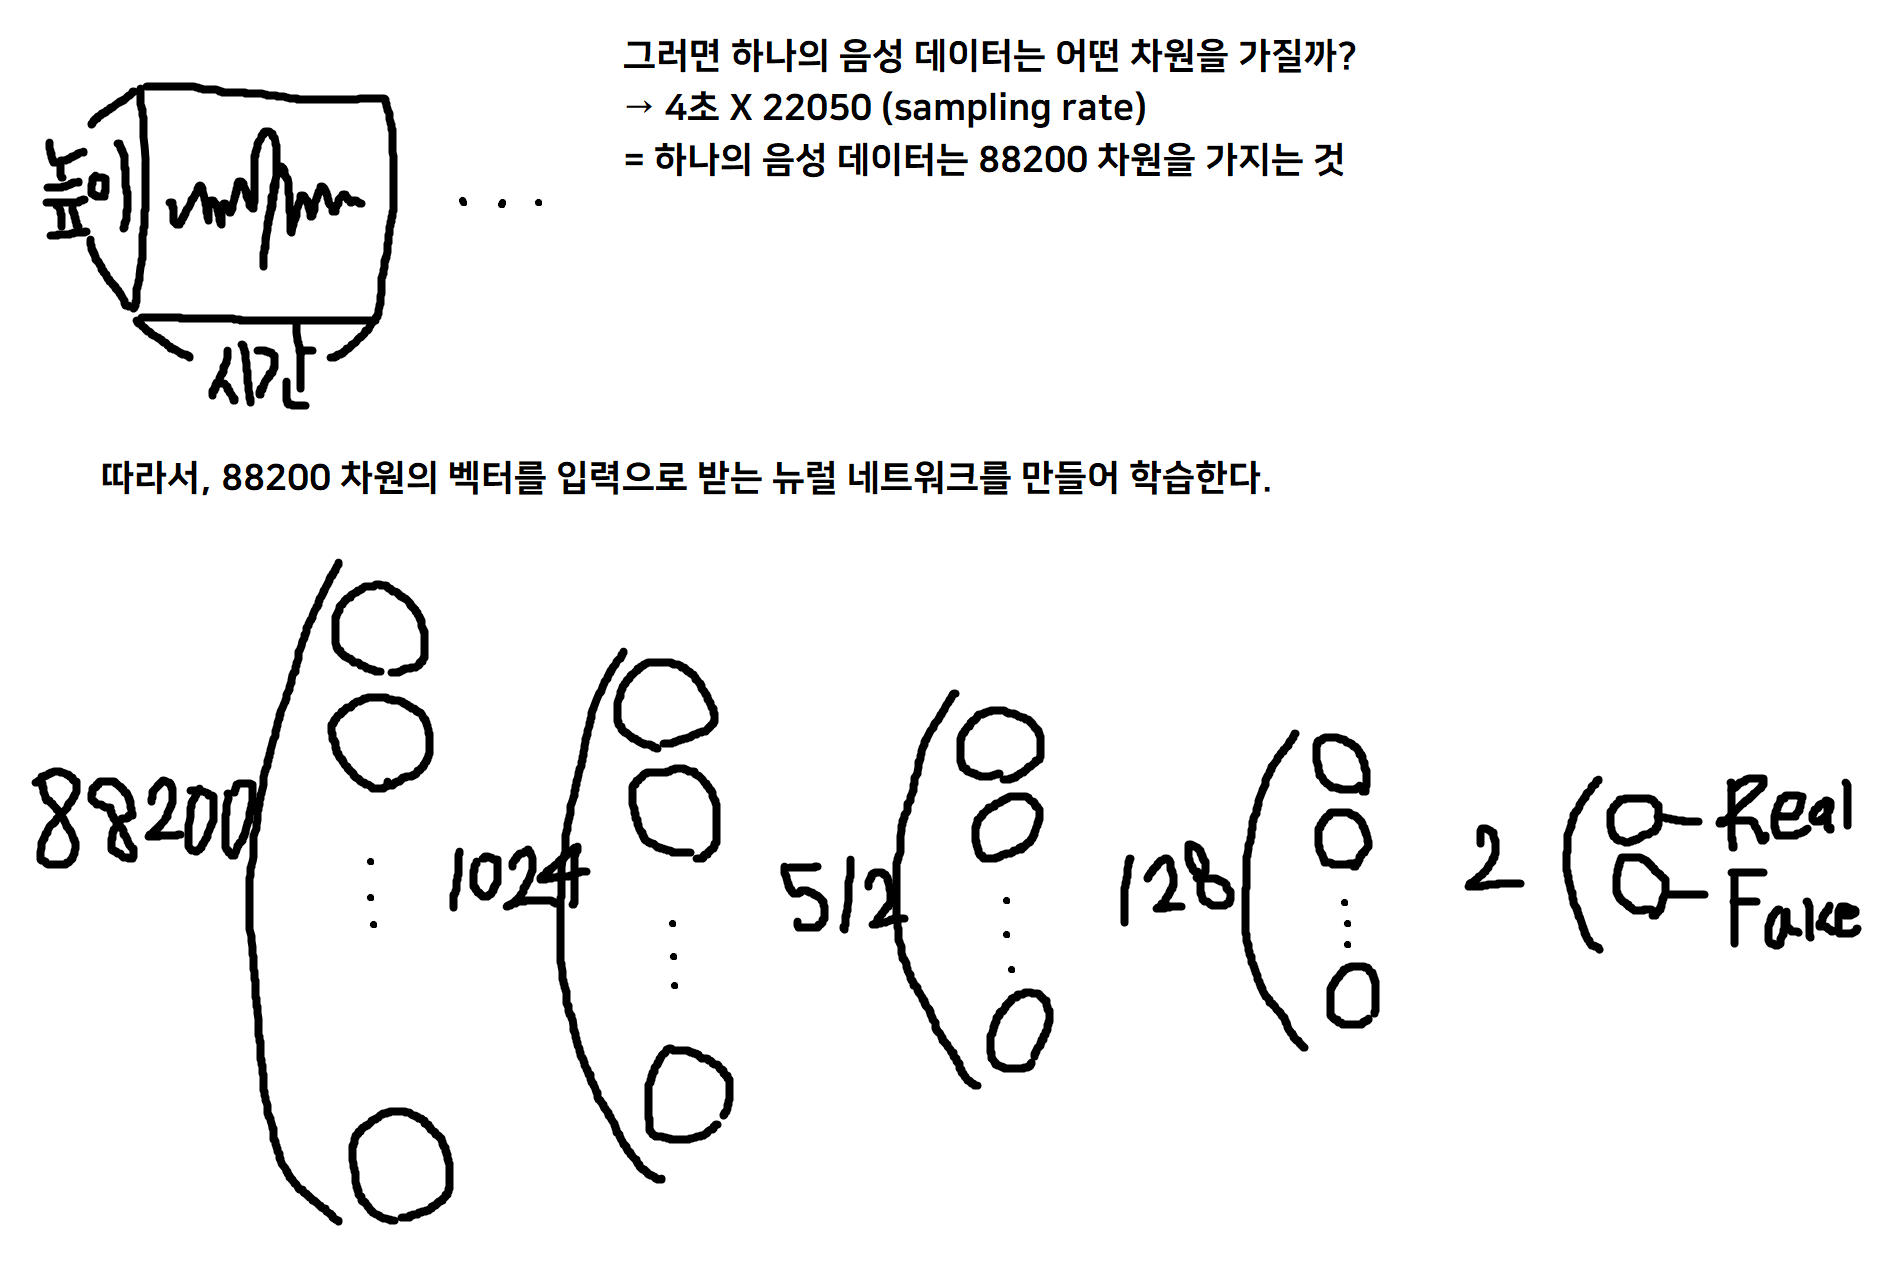

In [ ]:
# fake_voice_data: 가짜 목소리 폴더
# real_voice_data: 진짜 목소리 폴더

import glob

fake_voice_data_list = glob.glob("./fake_voice_data/trim_4s/*")
real_voice_data_list = glob.glob("./real_voice_data/*")

print("가짜 목소리 개수:", len(fake_voice_data_list))
print("진짜 목소리 개수:", len(real_voice_data_list))

가짜 목소리 개수: 6702
진짜 목소리 개수: 3253


* 가짜 데이터와 진짜 데이터 각각 3,000개씩만 활용

In [ ]:
audio_time_series = [] # 학습 데이터의 입력(x)
labels = [] # 학습 데이터의 출력(y)
sample_rates = [] # 오디오 데이터의 샘플링 레이트

cnt = 0

for file_path in fake_voice_data_list:
    wav, sr = librosa.load(file_path) # 오디오(wav), 샘플링 레이트(sr)
    wav = get_fixed_audio_len(wav, sr, audio_len=4) # 4초로 만들기
    audio_time_series.append(wav)
    sample_rates.append(sr)
    labels.append(1) # 가짜는 1로 분류

    cnt += 1
    if cnt % 1000 == 0:
        print("처리된 오디오 데이터 수:", cnt)
    # 데이터가 너무 많아서 팅기므로, 3,000개로 조절
    if cnt % 3000 == 0:
        break

cnt = 0

for file_path in real_voice_data_list:
    wav, sr = librosa.load(file_path) # 오디오(wav), 샘플링 레이트(sr)
    wav = get_fixed_audio_len(wav, sr, audio_len=4) # 4초로 만들기
    audio_time_series.append(wav)
    sample_rates.append(sr)
    labels.append(0) # 진짜는 0로 분류

    cnt += 1
    if cnt % 1000 == 0:
        print("처리된 오디오 데이터 수:", cnt)
    # 데이터가 너무 많아서 팅기므로, 3,000개로 조절
    if cnt % 3000 == 0:
        break

처리된 오디오 데이터 수: 1000
처리된 오디오 데이터 수: 2000
처리된 오디오 데이터 수: 3000
처리된 오디오 데이터 수: 1000
처리된 오디오 데이터 수: 2000
처리된 오디오 데이터 수: 3000


In [ ]:
# 처리된 데이터를 다 NumPy 객체로 만들기
numpy_audio_time_series = np.stack(audio_time_series, axis=0)
numpy_sample_rates = np.array(sample_rates)
numpy_labels = np.array(labels)

In [ ]:
print(numpy_audio_time_series.shape) # (6000개, 4초 * 22050)
print(numpy_sample_rates.shape) # 6000개
print(numpy_labels.shape) # 6000개

X = numpy_audio_time_series
y = numpy_labels

(6000, 88200)
(6000,)
(6000,)


* 학습용 데이터와 테스트용 데이터로 나누고 섞기
  * 20%는 테스트용, 80%는 학습용

In [ ]:
from sklearn.model_selection import train_test_split

# 데이터를 학습용(train), 테스트용(test)으로 나누고, 섞기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

print(y_train[:10])

(4800, 88200)
(1200, 88200)
(4800,)
(1200,)
[0 0 1 1 1 1 0 0 1 0]


In [ ]:
import torch
import torch.utils.data as data_utils

# Torch 객체로 바꾸어주기
train_X = torch.from_numpy(X_train)
train_Y = torch.from_numpy(y_train)

val_X = torch.from_numpy(X_test)
val_Y = torch.from_numpy(y_test)

# DataLoader 객체 만들기
train_dataset = data_utils.TensorDataset(train_X, train_Y)
val_dataset = data_utils.TensorDataset(val_X, val_Y)

train_loader = data_utils.DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = data_utils.DataLoader(val_dataset, batch_size=32, shuffle=False)

print(len(train_dataset))
print(len(val_dataset))

4800
1200


In [ ]:
# Defining training parameters
LEARNING_RATE = 0.001
EPOCHS = 10
NUM_CLASSES = 2
N_FEATURES = train_dataset[0][0].shape[0]

print(N_FEATURES)

88200


In [ ]:
def evaluate(model, test_loader):
    '''
    Returns the accuracy and loss of a model

    Parameters
    --------------
    model: A PyTorch neural network

    test_loader: The test dataset in the form of torch DataLoader
    '''
    model.eval()
    num_test_batches = len(test_loader)
    with torch.no_grad():
        correct = 0
        total = 0
        total_loss = 0
        for i, batch in enumerate(test_loader):
            inputs, labels = batch
            outputs = model(inputs)
            _, predicted = torch.max(outputs, dim = 1)
            loss = loss_fn(outputs, labels)
            total_loss += loss.item()

            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            # Printing progress
            print((i+1), num_test_batches)

        accuracy = correct/total
        test_loss = total_loss/num_test_batches

    return accuracy, test_loss

# val_acc, val_loss = evaluate(net, val_loader)
# print("\n\nValidation accuracy: {:.4f}".format(round(val_acc, 4)))
# print("Validation loss: {:.4f}".format(round(val_loss, 4)))

In [ ]:
import torch.nn as nn

# Defining our neural network architecture
class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()

        # Layer 1 with 1024 neurons
        self.fc1 = nn.Linear(in_features = N_FEATURES, out_features = 1024)

        # Layer 2 with 512 neurons
        self.fc2 = nn.Linear(in_features = 1024, out_features = 512)

        # Layer 3 with 128 neurons
        self.fc3 = nn.Linear(in_features = 512, out_features = 128)

        # Layer 4, output layer
        self.fc4 = nn.Linear(in_features = 128, out_features = NUM_CLASSES)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)

        return x

In [ ]:
import torch.nn.functional as F
import torch.optim as optim

# Defining loss and optimizer
net = NeuralNet()

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr = LEARNING_RATE)

In [ ]:
num_train_batches = len(train_loader)
loss_hist = []
acc_hist = []
loss_hist_val = []
acc_hist_val = []

for epoch in range(EPOCHS):
    print("Epoch " + str(epoch + 1) + ":")

    for i, batch in enumerate(train_loader):
        # batch is a tuple of input data and labels
        inputs, labels = batch

        # Running forward pass
        outputs = net(inputs)
        loss = loss_fn(outputs, labels)

        # Backprop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Measuring Accuracy
        total = labels.size(0)
        _, predicted = torch.max(outputs, dim = 1)
        correct = (predicted == labels).sum().item()
        accuracy = correct/total

        # Printing progress
        print((i+1), num_train_batches, '\t loss: {:.4f} \t acc: {:.4f}'.format(round(loss.item(), 4), round(accuracy, 4)))

    print('\n\n')
    acc_hist.append(accuracy)
    loss_hist.append(loss.item())

    val_acc, val_loss = evaluate(net, val_loader)
    loss_hist_val.append(val_loss)
    acc_hist_val.append(val_acc)

Epoch 1:
1 150 	 loss: 0.6858 	 acc: 0.6250
2 150 	 loss: 0.6889 	 acc: 0.5625
3 150 	 loss: 0.6625 	 acc: 0.7188
4 150 	 loss: 0.6052 	 acc: 0.8125
5 150 	 loss: 0.4927 	 acc: 0.8438
6 150 	 loss: 0.4809 	 acc: 0.8125
7 150 	 loss: 0.5719 	 acc: 0.7188
8 150 	 loss: 0.5387 	 acc: 0.8438
9 150 	 loss: 0.3880 	 acc: 0.8438
10 150 	 loss: 0.5816 	 acc: 0.6875
11 150 	 loss: 0.7253 	 acc: 0.7812
12 150 	 loss: 0.4410 	 acc: 0.8125
13 150 	 loss: 0.4843 	 acc: 0.8438
14 150 	 loss: 0.4364 	 acc: 0.8438
15 150 	 loss: 0.5412 	 acc: 0.9062
16 150 	 loss: 0.5368 	 acc: 0.7188
17 150 	 loss: 0.4251 	 acc: 0.9688
18 150 	 loss: 0.4816 	 acc: 0.8125
19 150 	 loss: 0.4709 	 acc: 0.8438
20 150 	 loss: 0.4038 	 acc: 0.9062
21 150 	 loss: 0.4090 	 acc: 0.8750
22 150 	 loss: 0.4925 	 acc: 0.7812
23 150 	 loss: 0.5296 	 acc: 0.7500
24 150 	 loss: 0.5233 	 acc: 0.8125
25 150 	 loss: 0.4062 	 acc: 0.8438
26 150 	 loss: 0.3978 	 acc: 0.8438
27 150 	 loss: 0.4953 	 acc: 0.7812
28 150 	 loss: 0.5833 	 acc:

KeyboardInterrupt: 

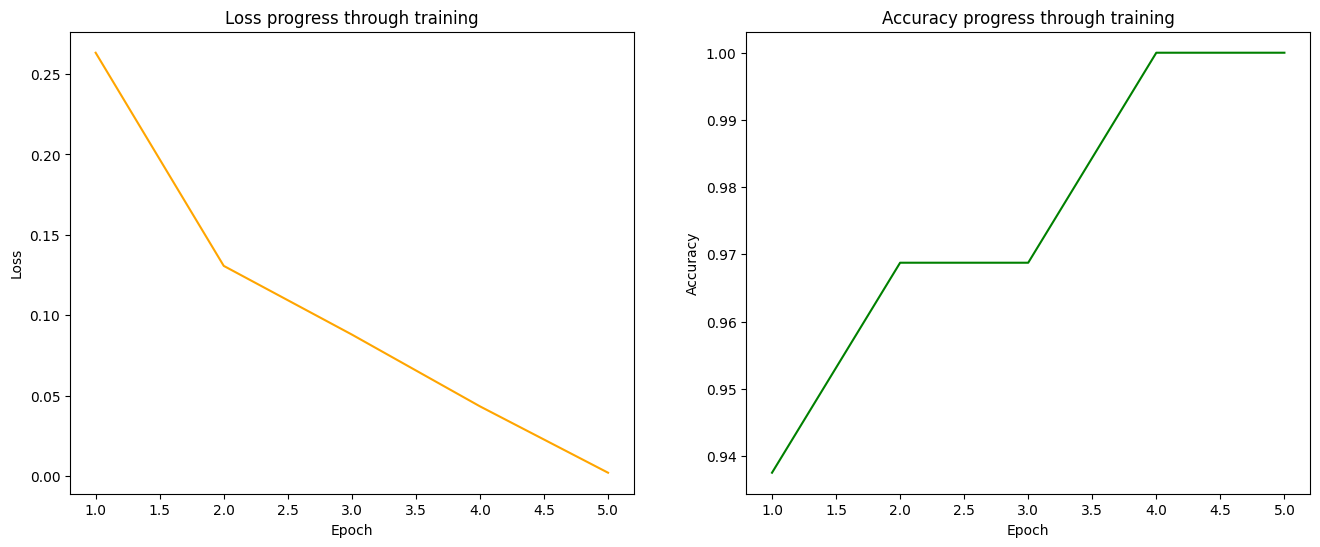

In [ ]:
# Plotting the losses and accuracies
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (16, 6))

ax[0].plot(range(1, len(loss_hist) + 1), loss_hist, c = 'orange')
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Epoch')
ax[0].set_title('Loss progress through training')

ax[1].plot(range(1, len(acc_hist) + 1), acc_hist, c = 'green')
ax[1].set_ylabel('Accuracy')
ax[1].set_xlabel('Epoch')
ax[1].set_title('Accuracy progress through training')

plt.show()

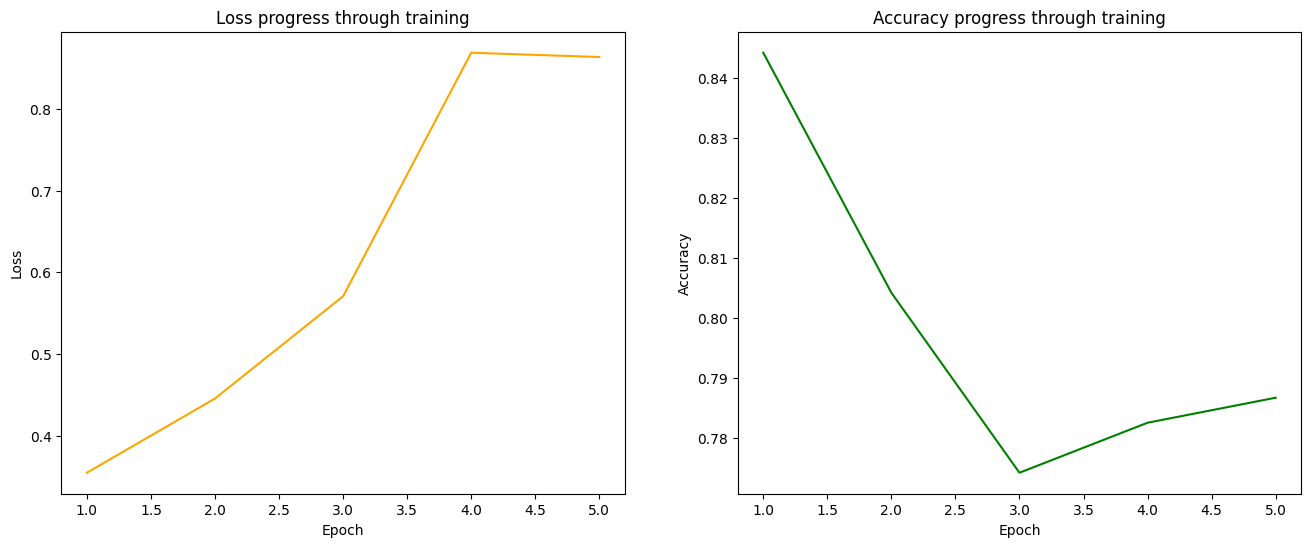

In [ ]:
# Plotting the losses and accuracies
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (16, 6))

ax[0].plot(range(1, len(loss_hist_val) + 1), loss_hist_val, c = 'orange')
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Epoch')
ax[0].set_title('Loss progress through training')

ax[1].plot(range(1, len(acc_hist_val) + 1), acc_hist_val, c = 'green')
ax[1].set_ylabel('Accuracy')
ax[1].set_xlabel('Epoch')
ax[1].set_title('Accuracy progress through training')

plt.show()

### <b>CNN을 이용한 오디오 분류 모델 구현</b>

In [ ]:
len(audio_time_series)

6000

In [ ]:
set(sample_rates)

{22050}

In [ ]:
train_sr = 22050
val_sr = 22050

print(len(audio_time_series))

6000


In [ ]:
def get_spec_loader(audio_time_series, sr, batch_size, shuffle=False):
    '''
    Returns data loader of spectrogram images

    Parameters
    ------------
    audio_time_series: Tensor Dataset with wav, label iterables

    sr: Sample rate

    batch_size: The batch size of data loader
    '''
    audio_spec_img = []
    labels = []
    curr = 0
    tot = len(audio_time_series)

    for wav, label in audio_time_series:
        spec_img = spec_to_image(get_melspectrogram_db(wav.numpy(), sr))
        spec_img = np.expand_dims(spec_img, axis = 0)
        audio_spec_img.append(spec_img)
        labels.append(label)

        curr += 1
        if curr % 500 == 0:
            print(curr)

    audio_spec_img = torch.Tensor(audio_spec_img)
    audio_spec_img = audio_spec_img / 255

    labels = torch.Tensor(labels).long()

    audio_spec_img = data_utils.TensorDataset(audio_spec_img, labels)
    audio_loader = data_utils.DataLoader(audio_spec_img, batch_size = batch_size, shuffle = shuffle)

    return audio_loader

In [ ]:
# Getting the spectrogram image for each audio in train set
train_loader = get_spec_loader(train_dataset, train_sr, 32, shuffle=True)

500
1000
1500
2000
2500
3000
3500
4000
4500


<ipython-input-49-363647250879>:28: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:275.)
  audio_spec_img = torch.Tensor(audio_spec_img)


In [ ]:
# Getting the spectrogram image for each audio in validation set
val_loader = get_spec_loader(val_dataset, val_sr, 32)

500
1000


In [ ]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()

        # Layer 1, Input shape (1, 128, 173) ->  Output shape (8, 62, 84)
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels = 1, out_channels = 8, kernel_size = (5, 6)),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = (2, 2)))

        # Layer 2, Input shape (8, 62, 84) -> Output shape (16, 30, 41)
        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels = 8, out_channels = 16, kernel_size = (3, 3)),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = (2, 2)))

        # Layer 3, Input shape (16, 30, 41) -> Output shape (64, 10, 15)
        self.layer3 = nn.Sequential(
            nn.Conv2d(in_channels = 16, out_channels = 32, kernel_size = (6, 7)),
            nn.ReLU(),
            nn.Conv2d(in_channels = 32, out_channels = 64, kernel_size = (6, 6)),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = (2, 2)))

        # Fully Connected layer 1, Input features 64 * 10 * 15 -> Output features 512
        self.fc1 = nn.Linear(in_features = 64 * 10 * 15, out_features = 512)

        # Fully Connected layer 2, Input features 512 -> Output features 256
        self.fc2 = nn.Linear(in_features = 512, out_features = 256)

        # Fully Connected layer 3, Input features 256 -> Output features 128
        self.fc3 = nn.Linear(in_features = 256, out_features = 128)

        # Fully Connected layer 4, Input features 128 -> Output features 10
        self.fc4 = nn.Linear(in_features = 128, out_features = NUM_CLASSES)

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)

        x = x.view(-1, self.num_flat_features(x))

        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)

        return x

    def num_flat_features(self, x):
        size = x.size()[1:]
        n_features = 1
        for s in size:
            n_features = n_features * s

        return n_features

In [ ]:
# Defining loss and optimizer
model = ConvNet()

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = LEARNING_RATE)

In [ ]:
THRESHOLD = 0.001  # Threshold for early stopping
THRESH_EPOCHS = 3 # Number of epochs loss does not decrease before early stopping
PATH = './ConvNet.pth.tar'  # Path to save the best model

loss_hist = []
acc_hist = []
loss_hist_val = []
acc_hist_val = []
num_train_batches = len(train_loader)

early_stop_epoch = 0
lowest_loss = np.inf

for epoch in range(EPOCHS):
    print("Epoch " + str(epoch + 1) + ":")

    for i, batch in enumerate(train_loader):
        # batch is a tuple of data and labels
        data, labels = batch

        # Running forward pass
        outputs = model(data)
        loss = loss_fn(outputs, labels)

        # Backprop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Measuring accuracy
        total = labels.size(0)
        _, predicted = torch.max(outputs, dim = 1)
        correct = (predicted == labels).sum().item()
        accuracy = correct / total

        # Printing progress
        print((i + 1), num_train_batches, '\t loss: {:.4f} \t acc: {:.4f}'.format(round(loss.item(), 4), round(accuracy, 4)))

    print('\n')

    if abs(lowest_loss - loss.item()) < THRESHOLD:
        early_stop_epoch += 1
        print('Loss did not decrease from ' + str(lowest_loss))

    else:
        print('Loss decreased from {:.4f} to {:.4f}, saving model to {}'.format(
            round(lowest_loss, 4), round(loss.item(), 4), PATH))

        lowest_loss = loss.item()
        early_stop_epoch = 0
        torch.save({'state_dict': model.state_dict()}, PATH)

    acc_hist.append(accuracy)
    loss_hist.append(loss.item())
    print('\n\n')

    val_acc, val_loss = evaluate(model, val_loader)
    loss_hist_val.append(val_loss)
    acc_hist_val.append(val_acc)

Epoch 1:
1 150 	 loss: 0.6959 	 acc: 0.4688
2 150 	 loss: 0.6909 	 acc: 0.7188
3 150 	 loss: 0.7084 	 acc: 0.4688
4 150 	 loss: 0.6782 	 acc: 0.6250
5 150 	 loss: 0.7208 	 acc: 0.3750
6 150 	 loss: 0.6879 	 acc: 0.5625
7 150 	 loss: 0.6917 	 acc: 0.5312
8 150 	 loss: 0.6888 	 acc: 0.5938
9 150 	 loss: 0.6989 	 acc: 0.3750
10 150 	 loss: 0.6874 	 acc: 0.6875
11 150 	 loss: 0.6939 	 acc: 0.4688
12 150 	 loss: 0.6982 	 acc: 0.3438
13 150 	 loss: 0.6920 	 acc: 0.5312
14 150 	 loss: 0.6922 	 acc: 0.5000
15 150 	 loss: 0.6932 	 acc: 0.4375
16 150 	 loss: 0.6906 	 acc: 0.9062
17 150 	 loss: 0.6909 	 acc: 0.6875
18 150 	 loss: 0.6896 	 acc: 0.6562
19 150 	 loss: 0.6878 	 acc: 0.6250
20 150 	 loss: 0.6869 	 acc: 0.6562
21 150 	 loss: 0.6845 	 acc: 0.6250
22 150 	 loss: 0.6911 	 acc: 0.5625
23 150 	 loss: 0.6800 	 acc: 0.7812
24 150 	 loss: 0.6902 	 acc: 0.5625
25 150 	 loss: 0.6716 	 acc: 0.7188
26 150 	 loss: 0.6659 	 acc: 0.6875
27 150 	 loss: 0.6428 	 acc: 0.7812
28 150 	 loss: 0.6060 	 acc:

KeyboardInterrupt: 

In [ ]:
# Getting the validation accuracy and loss
# val_acc, val_loss = evaluate(model, val_loader)

# print("\n\nValidation accuracy: {:.4f}".format(round(val_acc, 4)))
# print("Validation loss: {:.4f}".format(round(val_loss, 4)))

1 38
2 38
3 38
4 38
5 38
6 38
7 38
8 38
9 38
10 38
11 38
12 38
13 38
14 38
15 38
16 38
17 38
18 38
19 38
20 38
21 38
22 38
23 38
24 38
25 38
26 38
27 38
28 38
29 38
30 38
31 38
32 38
33 38
34 38
35 38
36 38
37 38
38 38


Validation accuracy: 0.9208
Validation loss: 0.2053


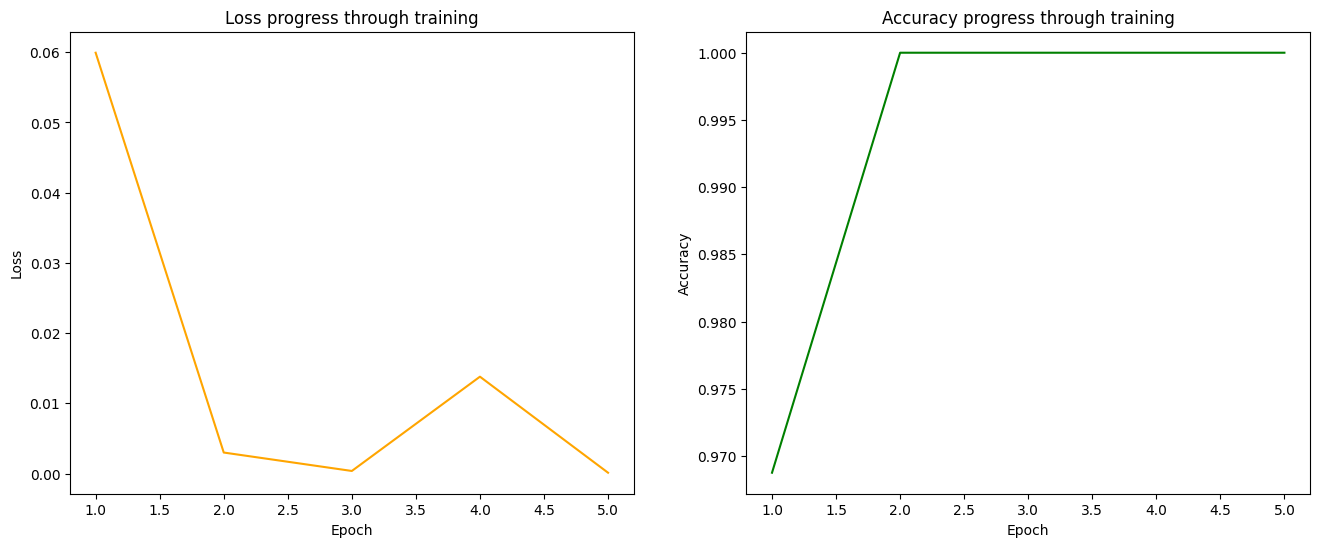

In [ ]:
# Plotting the losses and accuracies
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (16, 6))

ax[0].plot(range(1, len(loss_hist) + 1), loss_hist, c = 'orange')
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Epoch')
ax[0].set_title('Loss progress through training')

ax[1].plot(range(1, len(acc_hist) + 1), acc_hist, c = 'green')
ax[1].set_ylabel('Accuracy')
ax[1].set_xlabel('Epoch')
ax[1].set_title('Accuracy progress through training')

plt.show()

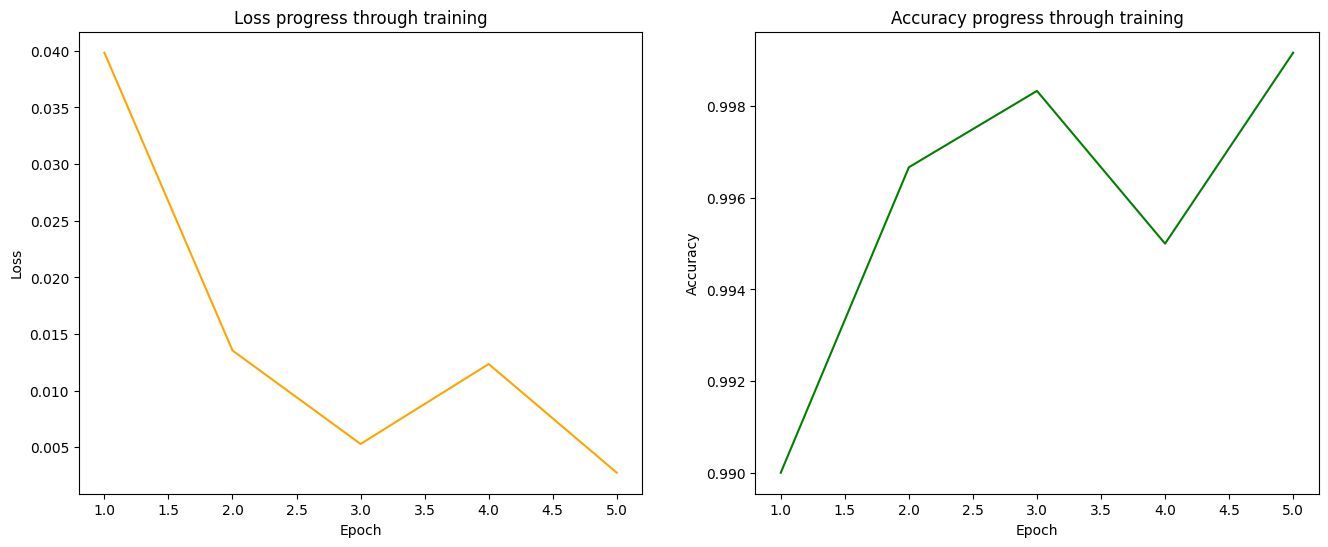

In [ ]:
# Plotting the losses and accuracies
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (16, 6))

ax[0].plot(range(1, len(loss_hist_val) + 1), loss_hist_val, c = 'orange')
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Epoch')
ax[0].set_title('Loss progress through training')

ax[1].plot(range(1, len(acc_hist_val) + 1), acc_hist_val, c = 'green')
ax[1].set_ylabel('Accuracy')
ax[1].set_xlabel('Epoch')
ax[1].set_title('Accuracy progress through training')

plt.show()